In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('data/第01章/人事評価結果.csv', encoding='shift_jis')

data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ID      800 non-null    int64 
 1   性別      800 non-null    object
 2   部署      800 non-null    object
 3   年代      800 non-null    object
 4   協調性     800 non-null    int64 
 5   自己主張    800 non-null    int64 
 6   技能      800 non-null    int64 
 7   知識      800 non-null    int64 
 8   ストレス    800 non-null    int64 
 9   総合      800 non-null    int64 
 10  昨年総合    800 non-null    int64 
dtypes: int64(8), object(3)
memory usage: 68.9+ KB


,ID,性別,部署,年代,協調性,自己主張,技能,知識,ストレス,総合,昨年総合
0,1,M,A部,中堅,70,45,65,71,53,251,248
1,2,F,B部,熟練,45,62,51,72,64,227,211
2,3,M,A部,中堅,54,70,55,70,61,249,242
3,4,M,A部,熟練,51,63,53,65,60,232,240
4,5,F,A部,若手,56,52,44,68,56,217,177


In [3]:
data.columns = [
    'id',
    'gender',
    'department',
    'age',
    'cooperativeness',
    'assertiveness',
    'skill',
    'knowledge',
    'stress',
    'total',
    'lastyear'
]

In [4]:
import seaborn as sns

<AxesSubplot:xlabel='stress', ylabel='Count'>

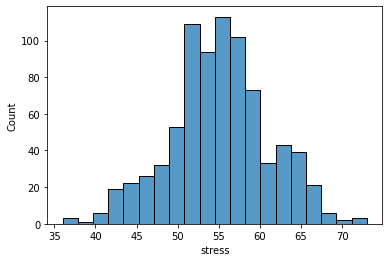

In [5]:
sns.histplot(data['stress'], bins=20)

In [6]:
data['stress'].mean()

55.0525

In [7]:
data['stress'].median()

55.0

In [8]:
data['age'].value_counts()

若手    315
中堅    308
熟練    177
Name: age, dtype: int64

In [9]:
data['stress'].std()

6.0228803416232575

In [10]:
data['stress'].var()

36.275087609511885

In [11]:
import numpy as np

# varは不偏分散
mean_stress = data['stress'].mean()

print('標本分散:')
print(np.sum((data['stress'] - mean_stress) ** 2) / len(data))

print('不偏分散:')
print(np.sum((data['stress'] - mean_stress) ** 2) / (len(data) - 1))

標本分散:
36.22974375
不偏分散:
36.275087609511885


In [12]:
# stdは不偏標準偏差
data['stress'].std() ** 2

36.275087609511885

In [13]:
# 平均偏差
np.mean(np.abs(data['stress'] - data['stress'].median()))

4.7325

In [14]:
age_transform = {
    '若手': 'young',
    '中堅': 'middle',
    '熟練': 'old'
}

data['age'] = data['age'].map(lambda x: age_transform[x])

data['age'].value_counts()

young     315
middle    308
old       177
Name: age, dtype: int64

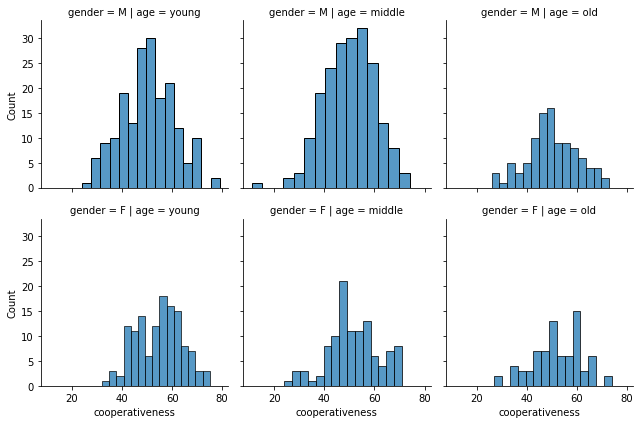

In [15]:
sns.FacetGrid(data, col='age', col_order=['young', 'middle', 'old'], row='gender', row_order=['M', 'F']) \
    .map(sns.histplot, 'cooperativeness', bins=15)

In [16]:
data.groupby('gender')['cooperativeness'].mean()

gender
F    52.921136
M    50.055901
Name: cooperativeness, dtype: float64

In [17]:
data.groupby('gender')['cooperativeness'].std()

gender
F     9.845809
M    10.116078
Name: cooperativeness, dtype: float64